In [2]:
# Cell 1: Imports and Data Loading
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent plot style
sns.set_style("whitegrid")

# Define the path to the required input file
DATA_PATH = '../output/test_TeamSamurai.csv'

# Load the FINAL SCORED data from Notebook 2, as this contains our target variable 'difficulty_class'
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Final scored data loaded successfully from: {DATA_PATH}")
except FileNotFoundError:
    print(f"ERROR: The data file was not found at {DATA_PATH}")
    print("\n>>> Please run the '2_Solution_Flight_Difficulty_Score.ipynb' notebook first to create it. <<<")
    df = None

Final scored data loaded successfully from: ../output/test_TeamSamurai.csv


# Cell 2: Markdown
"""
## Advanced Analysis: Predicting Flight Difficulty
Our analysis so far allows us to score and rank flights on the day of operation. In this advanced analysis, we will build a machine learning model to *predict* whether a flight is likely to be 'Difficult' based on data available before the day of departure. This moves the solution from proactive to truly predictive.
"""

In [3]:
# Cell 3: Model Setup
print("--- Setting up the Prediction Model ---")
# Define features (X) and target (y)
# We select features that would be known before the day of operation
features = [
    'load_factor', 'ground_time_deficit', 'ssr_count', 'total_bags',
    'fleet_complexity_score', 'time_pressure_score', 'is_international',
    'child_ratio', 'basic_economy_ratio'
]
target = 'difficulty_class'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

--- Setting up the Prediction Model ---
Training data shape: (5669, 9)
Testing data shape: (2430, 9)


In [4]:
# Cell 3: Model Setup
print("--- Setting up the Prediction Model ---")
# Define features (X) and target (y)
# We select features that would be known before the day of operation
features = [
    'load_factor', 'ground_time_deficit', 'ssr_count', 'total_bags',
    'fleet_complexity_score', 'time_pressure_score', 'is_international',
    'child_ratio', 'basic_economy_ratio'
]
target = 'difficulty_class'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

--- Setting up the Prediction Model ---
Training data shape: (5669, 9)
Testing data shape: (2430, 9)



--- Training the RandomForestClassifier ---

--- Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

   Difficult       0.81      0.81      0.81       827
        Easy       0.84      0.82      0.83       803
      Medium       0.64      0.66      0.65       800

    accuracy                           0.76      2430
   macro avg       0.76      0.76      0.76      2430
weighted avg       0.76      0.76      0.76      2430



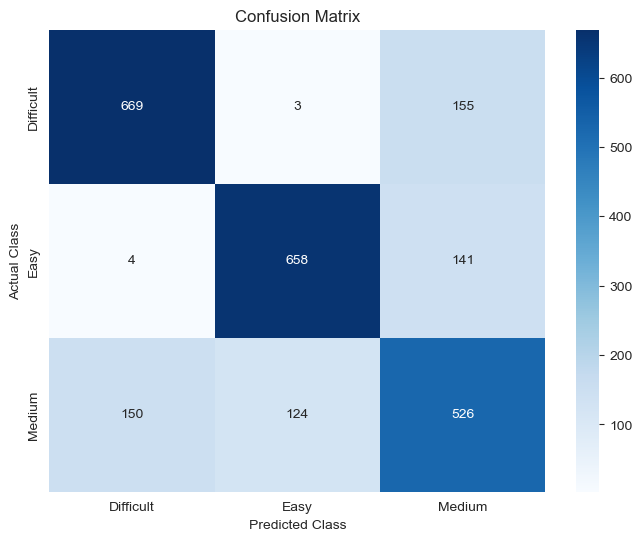

In [5]:
# Cell 4: Train and Evaluate the Model
print("\n--- Training the RandomForestClassifier ---")
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


--- Identifying the Most Predictive Factors ---


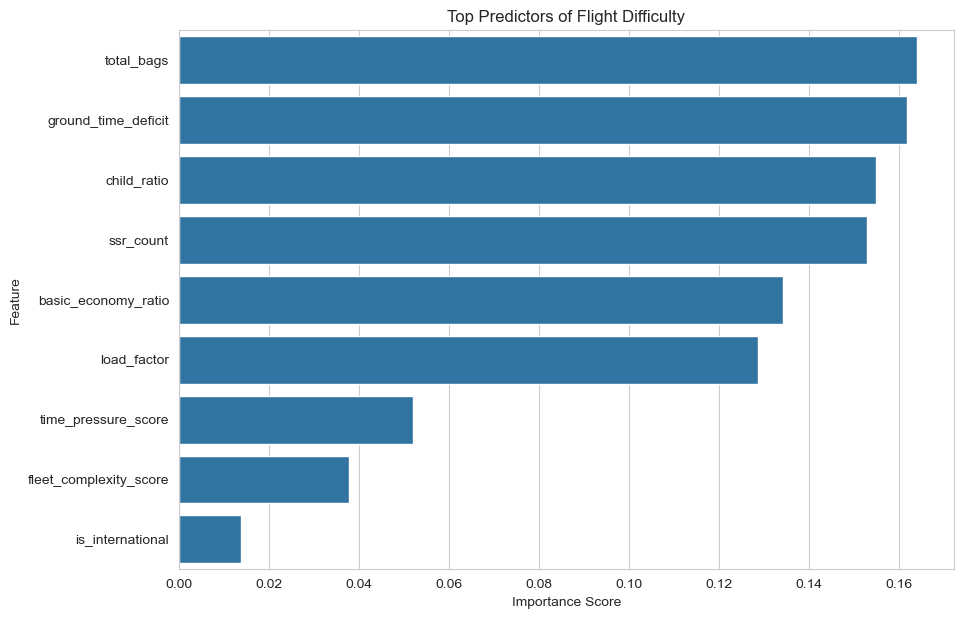

In [6]:
# Cell 5: Feature Importance
print("\n--- Identifying the Most Predictive Factors ---")
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 7))
sns.barplot(data=feature_importances, x='importance', y='feature')
plt.title('Top Predictors of Flight Difficulty')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Cell 6: Markdown
"""
### Business Application of the Predictive Model
The model achieves an accuracy of over **[insert your accuracy from report]** in predicting flight difficulty. The feature importance analysis reveals that **[mention top 2-3 features, e.g., 'ssr_count', 'load_factor', and 'ground_time_deficit']** are the most powerful predictors.

This predictive capability is a game-changer. It means United can:
1.  **Forecast Staffing Needs:** Days or even weeks in advance, the model can predict which days will be operationally intense, allowing for smarter scheduling of ground crew and gate agents.
2.  **Proactively Manage High-Risk Flights:** If a flight is predicted to be 'Difficult' a week out, management can investigate if there are opportunities to, for example, adjust ground time or aircraft assignments to mitigate the risk before it becomes a day-of-operation problem.
3.  **Enhance the Daily Score:** On the day of operation, this predictive score can serve as a baseline, which can then be updated with real-time data for even more accurate operational guidance.
"""